In [416]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
import random
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model

%matplotlib inline

import csv
from sklearn import ensemble
import math
from sklearn.metrics import confusion_matrix

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin

sns.set_context('notebook')
sns.set_style("darkgrid")

import requests
from bs4 import BeautifulSoup
from IPython.display import IFrame, HTML

import warnings
warnings.filterwarnings('ignore')

def get_axs(rows, columns, fig_size_width, fig_size_height):
    dims = (fig_size_width, fig_size_height)
    fig, axs = plt.subplots(rows, columns, figsize=dims)
    if(rows*columns>1):
         axs = axs.ravel()
    return axs

def split(data, train_size_pc, y_col):
    np.random.seed(9001)
    msk = np.random.rand(len(data)) < train_size_pc
    data_train = data[msk]
    data_test = data[~msk]

    x_train = data_train.iloc[:,0:y_col]
    y_train = data_train.iloc[:,y_col]

    x_test = data_test.iloc[:,0:y_col]
    y_test = data_test.iloc[:,y_col]
    return x_train, y_train, x_test, y_test

### Project Goal

We intend to study the characteristics of the overall system (looking across all the MSA) on the murder rates. Given that cities morph and therefore change its characteristics, we want to analyze the correlation in relation to the years. The data we have collected include the following: (1) population, (2) gender, (3) race, (4) age groups, (5) income, (6) educational attainment, and (7) marital status. All data have been normalized.

#### Import cleaned crime data

In [302]:
crime_data = pd.read_csv("crime_data.csv", index_col = 0)

In [300]:
crime_data.head()

,msa,pop,r1,r2,r3,r4,r5,r6,r7,m1,...,a4,a5,a6,a7,e6,vr,mtof,year,firearms,murder_rate
0,10180.0,158548.0,0.741838,0.068295,0.003570,0.014292,0.000000,0.148264,0.023740,0.402578,...,0.061836,0.127318,0.187823,0.176104,0.288004,0.110698,0.990909,2006.0,7458.0,3.7
1,10380.0,336502.0,0.896527,0.019961,0.003123,0.000758,0.000000,0.058686,0.020945,0.355953,...,0.070047,0.139111,0.188593,0.175378,0.151001,0.159707,0.981568,2006.0,63.0,2.5
2,10420.0,700943.0,0.844866,0.116880,0.002129,0.017715,0.000564,0.006270,0.011577,0.410049,...,0.058670,0.143027,0.223245,0.177161,0.269000,0.084189,0.929250,2006.0,2957.0,3.5
3,10500.0,165062.0,0.485957,0.494136,0.001557,0.006355,0.000000,0.003453,0.008542,0.356078,...,0.059547,0.133968,0.197671,0.158795,0.302999,0.111244,0.908452,2006.0,2362.0,6.5
4,10580.0,850957.0,0.867237,0.070216,0.002378,0.030761,0.000159,0.014440,0.014809,0.396424,...,0.061225,0.144726,0.220473,0.179010,0.271001,0.106216,0.943925,2006.0,1978.0,2.1


In [12]:
crime_data.columns

Index(['msa', 'pop', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'm1', 'm2',
       'm3', 'm4', 'm5', 'i1', 'i2', 'e1', 'e2', 'e3', 'e4', 'e5', 'a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'a7', 'e6', 'vr', 'mtof', 'year', 'firearms',
       'murder_rate'],
      dtype='object')

#### First look at crime
Before we tackled the predictors, we looked at just the crime data to see if there's any obvious trends over the years 2006 to 2016.

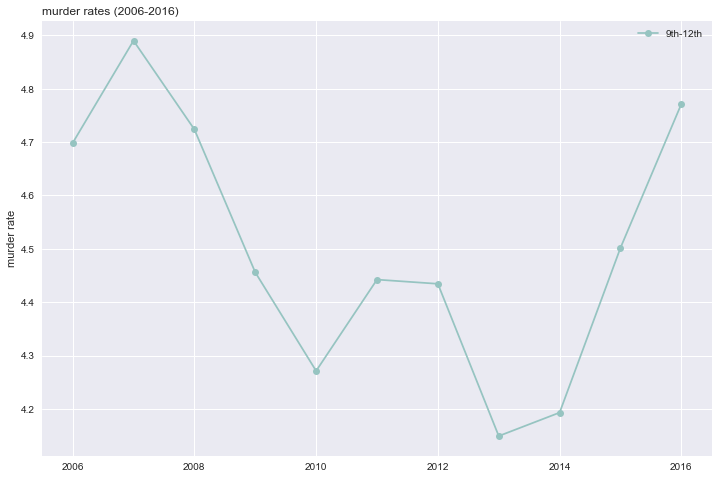

In [489]:
years = np.arange(2006, 2017)
axs = get_axs(1,1,12,8)

murder =[]


for i,year in enumerate(years):
    crime_data_sub = crime_data[crime_data['year'] == year]      
    murder.append(np.mean(crime_data_sub['murder_rate'])) 

plt.plot(years, murder, marker='o', label = '9th-12th', color = '#96c4c1')

plt.title('murder rates (2006-2016)', loc='left')

plt.ylabel('murder rate')
plt.legend(loc=1)


#### Population
Is there any correlation between population size and crime rate? We look at this range within each of the years. We then looked at the overall population across all the years. The data we were missing was the land area for each MSA to get a more accurate reading of the data with population density. 

The data we see based on the population numbers do NOT show a strong correlation with that of the murder rate. 

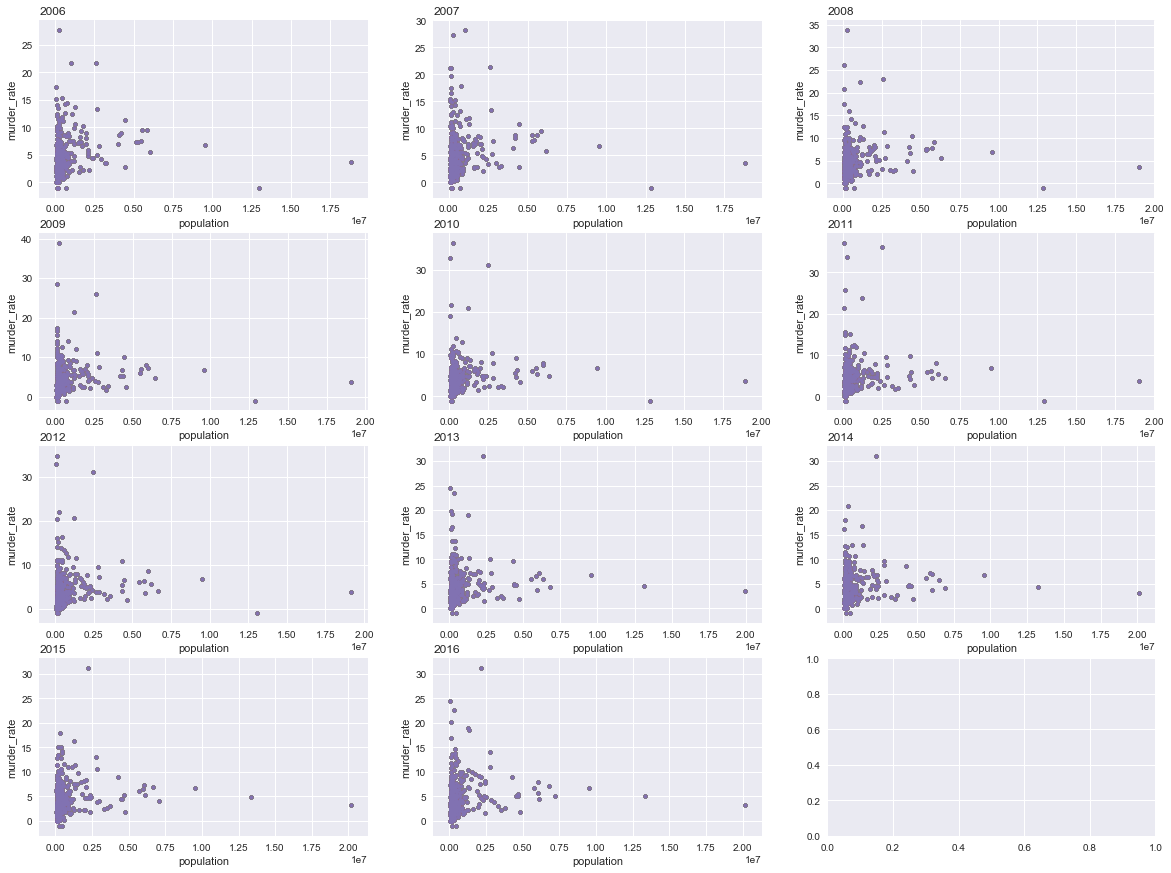

In [263]:
years = range(2006, 2017)
axs = get_axs(4,3,20,15)

crime_data_sub ={}

for i, year in enumerate(years):
    for j in crime_data:
        crime_data_sub[year] = crime_data[crime_data['year'] == year]      
        axs[i].scatter(crime_data_sub[year]['pop'], crime_data_sub[year]['murder_rate'], marker='.') 
        axs[i].set_title(year, loc='left')
        axs[i].set_xlabel('population')
        axs[i].set_ylabel('murder_rate')


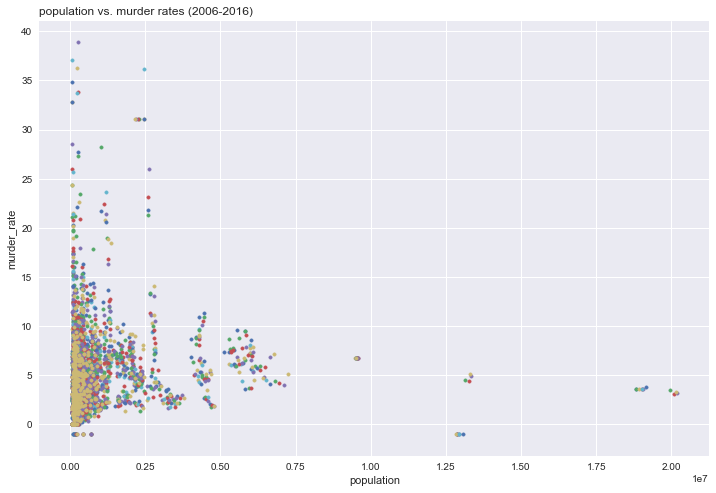

In [491]:
years = range(2006, 2017)
axs = get_axs(1,1,12,8)

crime_data_sub ={}

for year in years:
    crime_data_sub[year] = crime_data[crime_data['year'] == year]      
    axs.scatter(crime_data_sub[year]['pop'], crime_data_sub[year]['murder_rate'], marker='.', label=year) 
    axs.set_title('population vs. murder rates (2006-2016)', loc='left')
    axs.set_xlabel('population')
    axs.set_ylabel('murder_rate')

#### Gender

Is there a correlation between areas more populated by male (or female) and murder rates? We looked at gender as a ratio between male and female and plotted how each MSA's male-to-female ratio relates to murder rates. Looking at the scatter plots, it is still unclear if there is any correlation between the two - this is partly due to how unclear it was to measure the total number of murders for areas with a male-to-female ratio of above and below 1.0. 

We then generated another chart that takes the average murder rate per each grouping (mostly male vs. mostly female). Here, we start to see the difference between the two groups (the areas with a lower male-to-female ratios tend to have higher murder rates) in both the overall data as well as the data by year. This can be attributed to an increased concentration of (female) victims in those areas. It'd be interesting to assess the murdered victim data to see if that is the case.

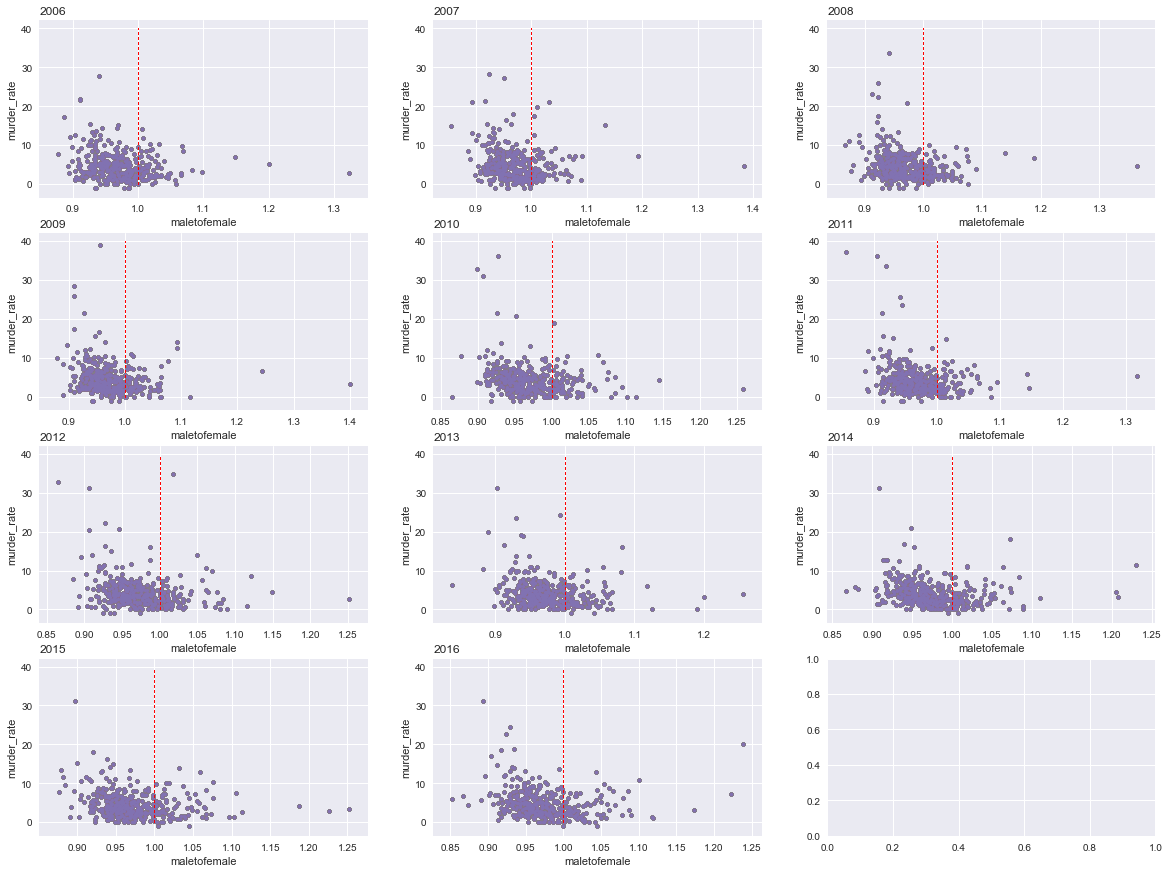

In [404]:
years = range(2006, 2017)
axs = get_axs(4,3,20,15)

crime_data_sub ={}

for i, year in enumerate(years):
    for j in crime_data:
        crime_data_sub[year] = crime_data[crime_data['year'] == year]      
        axs[i].scatter(crime_data_sub[year]['mtof'], crime_data_sub[year]['murder_rate'], marker='.') 
        axs[i].set_title(year, loc='left')
        axs[i].set_xlabel('maletofemale')
        axs[i].set_ylabel('murder_rate')
        axs[i].plot((1,1),(0,40), color='red', dashes=[5, 5], linewidth=.5)


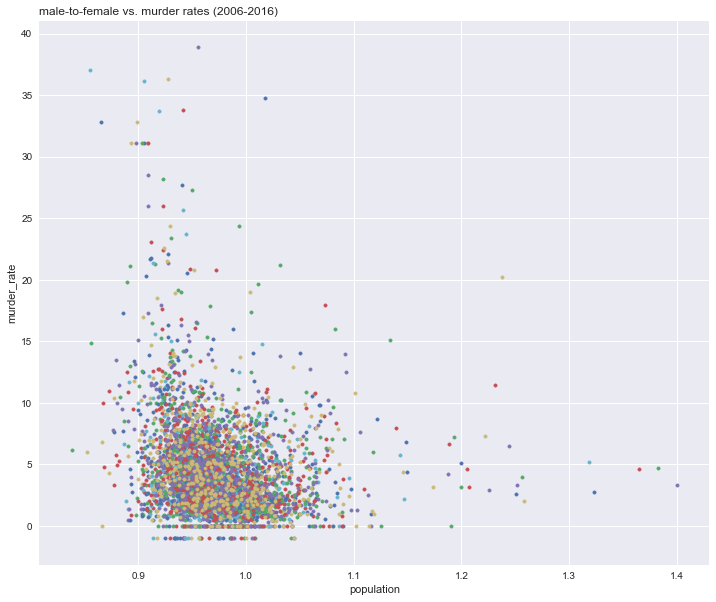

In [405]:
years = range(2006, 2017)
axs = get_axs(1,1,12,10)

crime_data_sub ={}

for year in years:
    crime_data_sub[year] = crime_data[crime_data['year'] == year]      
    axs.scatter(crime_data_sub[year]['mtof'], crime_data_sub[year]['murder_rate'], marker='.') 
    axs.set_title('male-to-female vs. murder rates (2006-2016)', loc='left')
    axs.set_xlabel('population')
    axs.set_ylabel('murder_rate')

*A Different Perspective*

In [424]:
mostly_male = []
mostly_female = []

for i in range(0, crime_data.shape[0]):
    row = crime_data.iloc[i]
    if row['mtof']> 1.0:
        mostly_male.append(row['murder_rate'])
    else:
        mostly_female.append(row['murder_rate'])

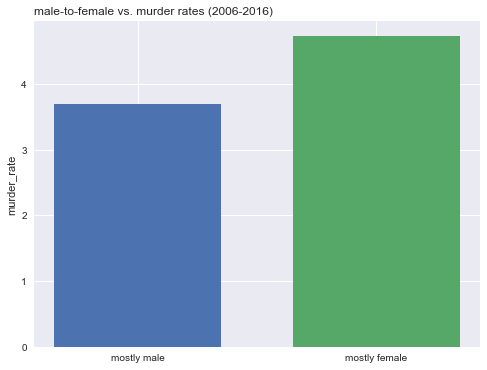

In [425]:
axs = get_axs(1,1,8,6)

axs.bar(1, np.mean(mostly_male), width = .35) 
axs.bar(1.5, np.mean(mostly_female), width = .35) 

axs.set_title('male-to-female vs. murder rates (2006-2016)', loc='left')
axs.set_ylabel('murder_rate')
axs.set_xticks([1,1.5])
axs.set_xticklabels(['mostly male', 'mostly female'])

*Per year*

In [431]:
mostly_male2 = []
mostly_female2 = []

years = np.arange(2006, 2017)
for year in years:
    male = crime_data[(crime_data['mtof']>1.0) & (crime_data['year'] == year)]['murder_rate']
    male = np.mean(male)
    mostly_male2.append(male)
    
    female = crime_data[(crime_data['mtof']<=1.0) & (crime_data['year'] == year)]['murder_rate']
    female = np.mean(female)
    mostly_female2.append(female)

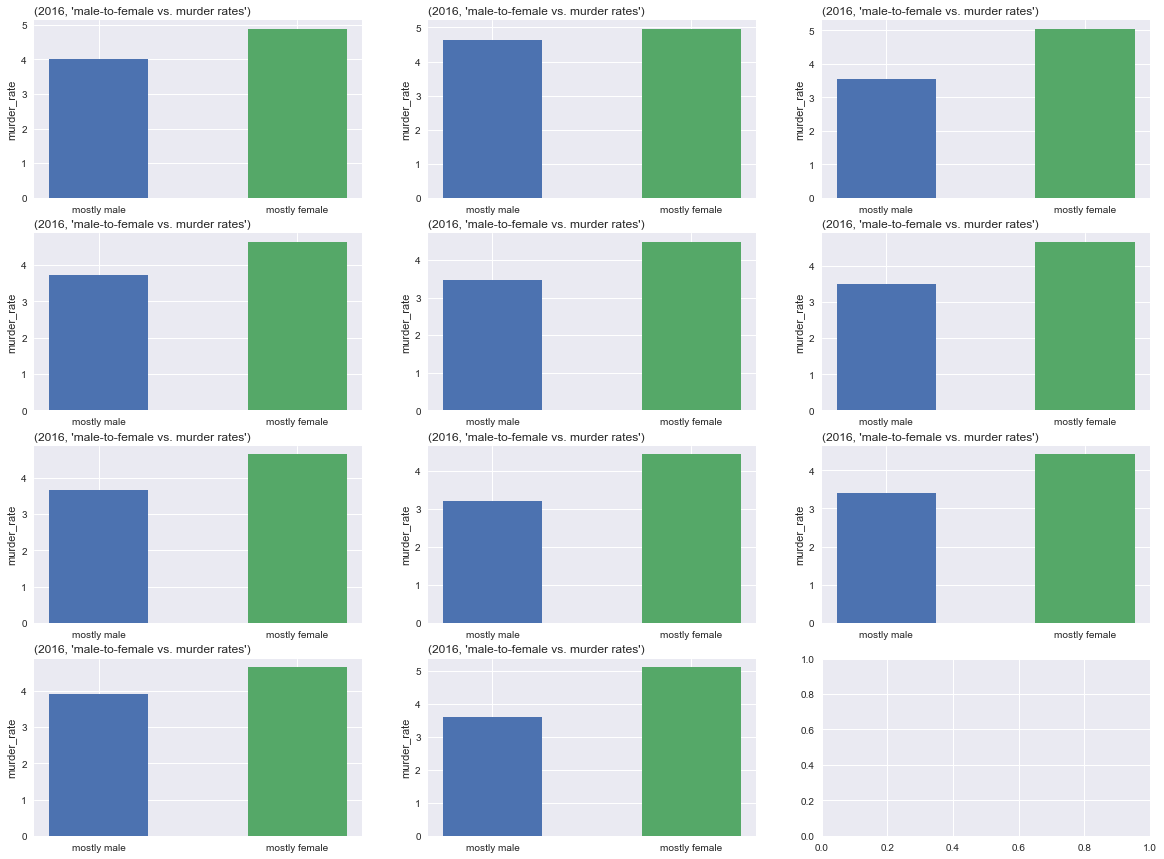

In [435]:
axs = get_axs(4,3,20,15)

for i in range(len(mostly_male2)):
    axs[i].bar(1, mostly_male2[i], width = .25)
    axs[i].bar(1.5, mostly_female2[i], width = .25)
    axs[i].set_title((year,'male-to-female vs. murder rates'), loc='left')
    axs[i].set_ylabel('murder_rate')
    axs[i].set_xticks([1,1.5])
    axs[i].set_xticklabels(['mostly male', 'mostly female'])

#### Race
Does certain concentrations of race in a given area correlate with murder rate? If we look at the data individually, by each racial groups, there seems to show little correlation with murder rates. But when we put them together and analyzed them by year, there is an interesting pattern that emerges when there is almost an equal proportion between whites and blacks - the murder rates increases as both the population of whites and blacks reaches an equal proportion (50/50). 


[[<matplotlib.axis.YTick at 0x2215513bef0>,
 []]

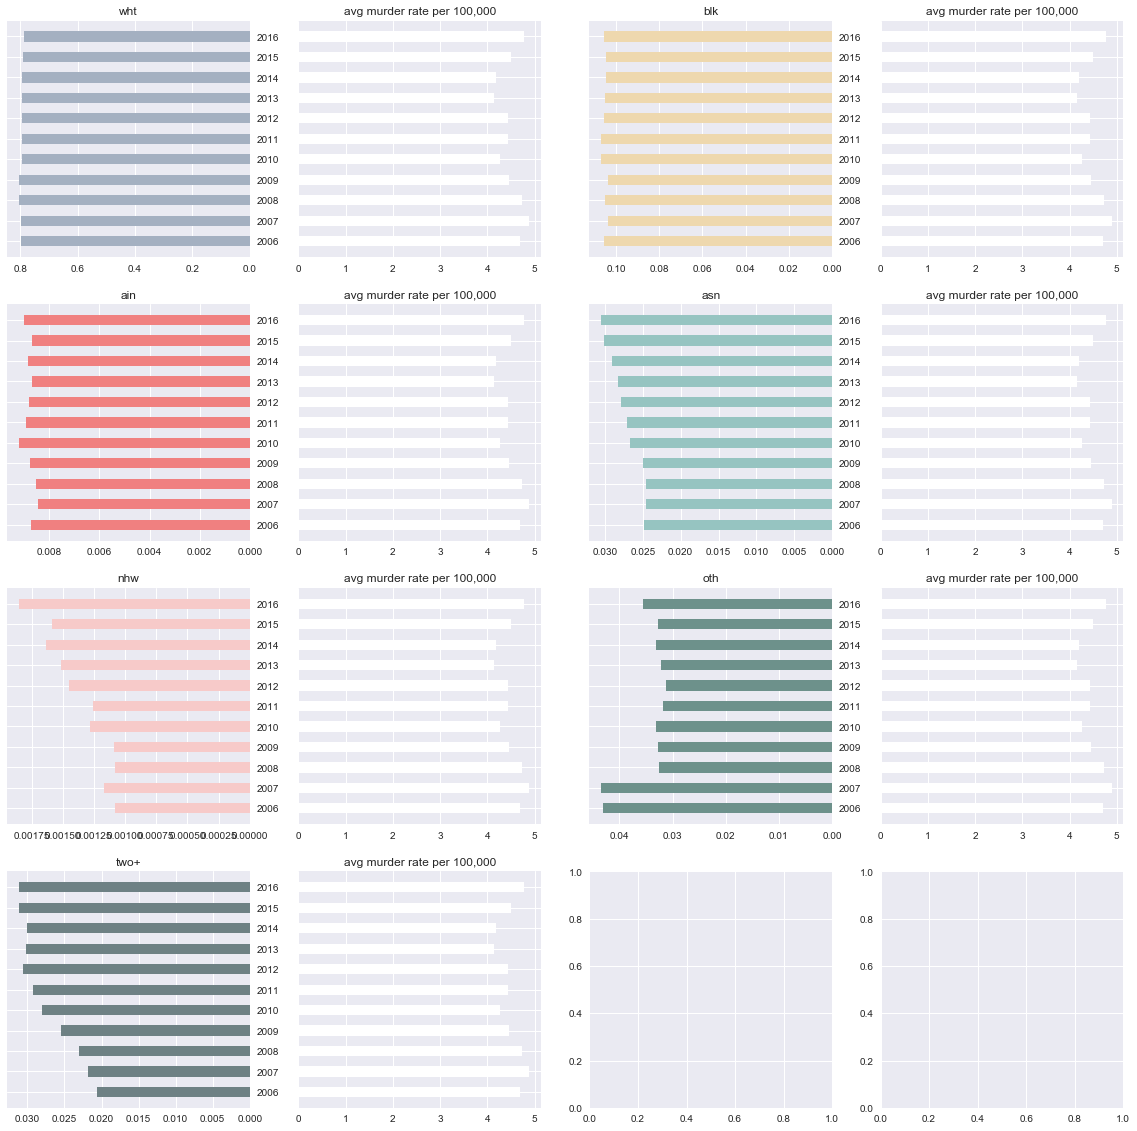

In [443]:
years = np.arange(2006, 2017)

columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
y = np.arange(1,12)

data_r1 = []
data_r2 = []
data_r3 = []
data_r4 = []
data_r5 = []
data_r6 = []
data_r7 = []

data_murder = []

for year in years:
    data_r1.append(np.mean(crime_data[crime_data['year'] == year]['r1']))
    data_r2.append(np.mean(crime_data[crime_data['year'] == year]['r2']))
    data_r3.append(np.mean(crime_data[crime_data['year'] == year]['r3']))
    data_r4.append(np.mean(crime_data[crime_data['year'] == year]['r4']))
    data_r5.append(np.mean(crime_data[crime_data['year'] == year]['r5']))
    data_r6.append(np.mean(crime_data[crime_data['year'] == year]['r6']))
    data_r7.append(np.mean(crime_data[crime_data['year'] == year]['r7']))

for year in years:
    data_murder.append(np.mean(crime_data[crime_data['year'] == year]['murder_rate']))    

axs = get_axs(4,4,20,20)
axs[0].barh(y, data_r1, align='center', color='#a4b0c1', zorder=10, height=0.5)
axs[0].set(title='wht')
axs[0].invert_xaxis()
axs[0].set(yticks=y, yticklabels=years)
axs[0].yaxis.tick_right()

axs[1].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[1].set(title='avg murder rate per 100,000')
axs[1].set(yticks=y, yticklabels=[])

axs[2].barh(y, data_r2, align='center', color='#eed8ae', zorder=10, height=0.5)
axs[2].set(title='blk')
axs[2].invert_xaxis()
axs[2].set(yticks=y, yticklabels=years)
axs[2].yaxis.tick_right()

axs[3].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[3].set(title='avg murder rate per 100,000')
axs[3].set(yticks=y, yticklabels=[])

axs[4].barh(y, data_r3, align='center', color='#f08080', zorder=10, height=0.5)
axs[4].set(title='ain')
axs[4].invert_xaxis()
axs[4].set(yticks=y, yticklabels=years)
axs[4].yaxis.tick_right()

axs[5].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[5].set(title='avg murder rate per 100,000')
axs[5].set(yticks=y, yticklabels=[])

axs[6].barh(y, data_r4, align='center', color='#96c4c1', zorder=10, height=0.5)
axs[6].set(title='asn')
axs[6].invert_xaxis()
axs[6].set(yticks=y, yticklabels=years)
axs[6].yaxis.tick_right()

axs[7].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[7].set(title='avg murder rate per 100,000')
axs[7].set(yticks=y, yticklabels=[])

axs[8].barh(y, data_r5, align='center', color='#f7cac9', zorder=10, height=0.5)
axs[8].set(title='nhw')
axs[8].invert_xaxis()
axs[8].set(yticks=y, yticklabels=years)
axs[8].yaxis.tick_right()

axs[9].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[9].set(title='avg murder rate per 100,000')
axs[9].set(yticks=y, yticklabels=[])

axs[10].barh(y, data_r6, align='center', color='#6d918b', zorder=10, height=0.5)
axs[10].set(title='oth')
axs[10].invert_xaxis()
axs[10].set(yticks=y, yticklabels=years)
axs[10].yaxis.tick_right()

axs[11].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[11].set(title='avg murder rate per 100,000')
axs[11].set(yticks=y, yticklabels=[])

axs[12].barh(y, data_r7, align='center', color='#6e8184', zorder=10, height=0.5)
axs[12].set(title='two+')
axs[12].invert_xaxis()
axs[12].set(yticks=y, yticklabels=years)
axs[12].yaxis.tick_right()

axs[13].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[13].set(title='avg murder rate per 100,000')
axs[13].set(yticks=y, yticklabels=[])


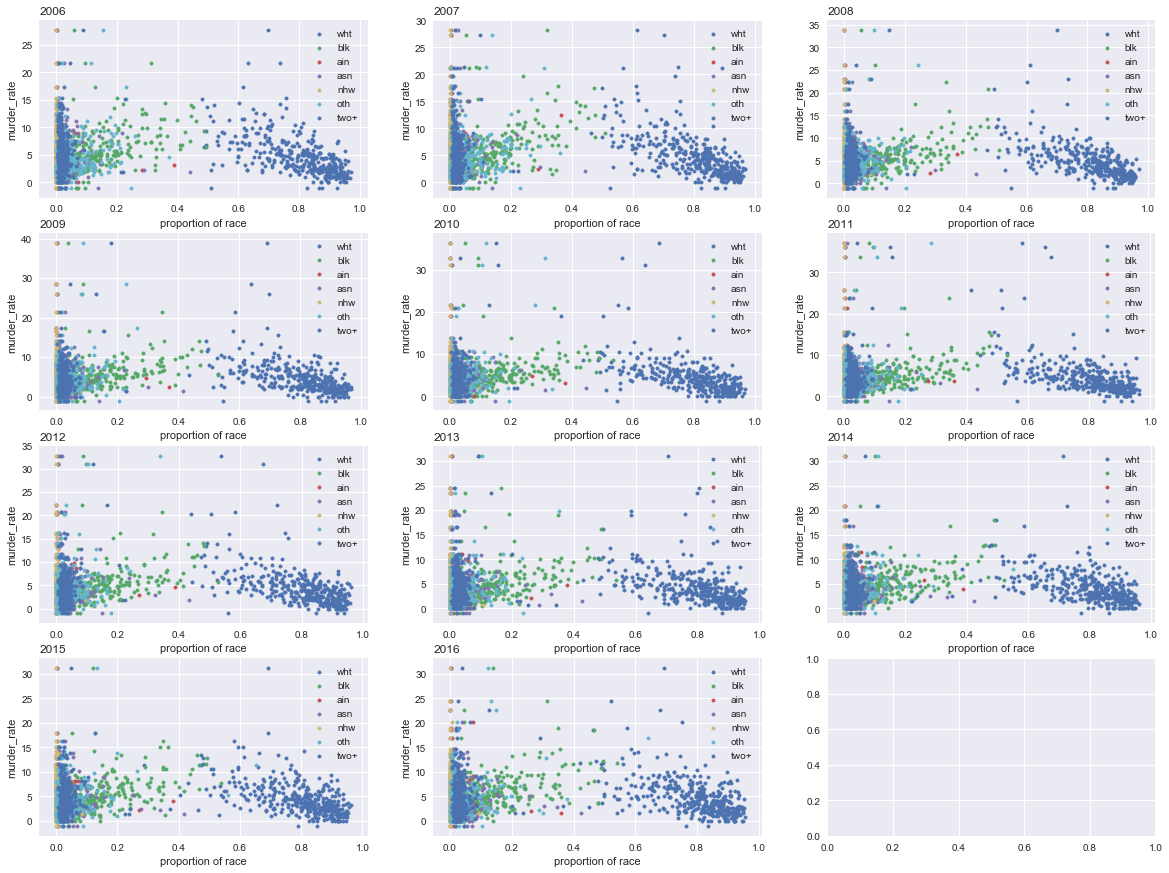

In [434]:
years = range(2006, 2017)
axs = get_axs(4,3,20,15)

crime_data_sub ={}

for i, year in enumerate(years):
    crime_data_sub[year] = crime_data[crime_data['year'] == year]      
    axs[i].scatter(crime_data_sub[year]['r1'],crime_data_sub[year]['murder_rate'], marker='.', label='wht') 
    axs[i].scatter(crime_data_sub[year]['r2'],crime_data_sub[year]['murder_rate'], marker='.', label='blk') 
    axs[i].scatter(crime_data_sub[year]['r3'],crime_data_sub[year]['murder_rate'], marker='.', label='ain') 
    axs[i].scatter(crime_data_sub[year]['r4'],crime_data_sub[year]['murder_rate'], marker='.', label='asn') 
    axs[i].scatter(crime_data_sub[year]['r5'],crime_data_sub[year]['murder_rate'], marker='.', label='nhw') 
    axs[i].scatter(crime_data_sub[year]['r6'],crime_data_sub[year]['murder_rate'], marker='.', label='oth') 
    axs[i].scatter(crime_data_sub[year]['r7'],crime_data_sub[year]['murder_rate'], marker='.', label='two+')  
        
    axs[i].set_title(year, loc='left')
    axs[i].set_xlabel('proportion of race')
    axs[i].set_ylabel('murder_rate')
    axs[i].legend()

#### Age Groups
Do areas with certain age concentrations correlate with higher crime rate? Prior to this exercise, we have omitted the age groups from 14 years and below since based on our initial research on the data, there is no significant correlation with those age groups. We first looked at the basic distribution across the different age groups to see if there are major shifts in demographics across the years. We then plotted each of the different age groups against murder rates. There is no strong correlation between murder rates and any of the age groups based on these graphs. 

We then tracked the growth/fall of each age group across the 11 years along with the increase/fall of the average murder rates for those years. Still, there is no strong correlation between the two. 

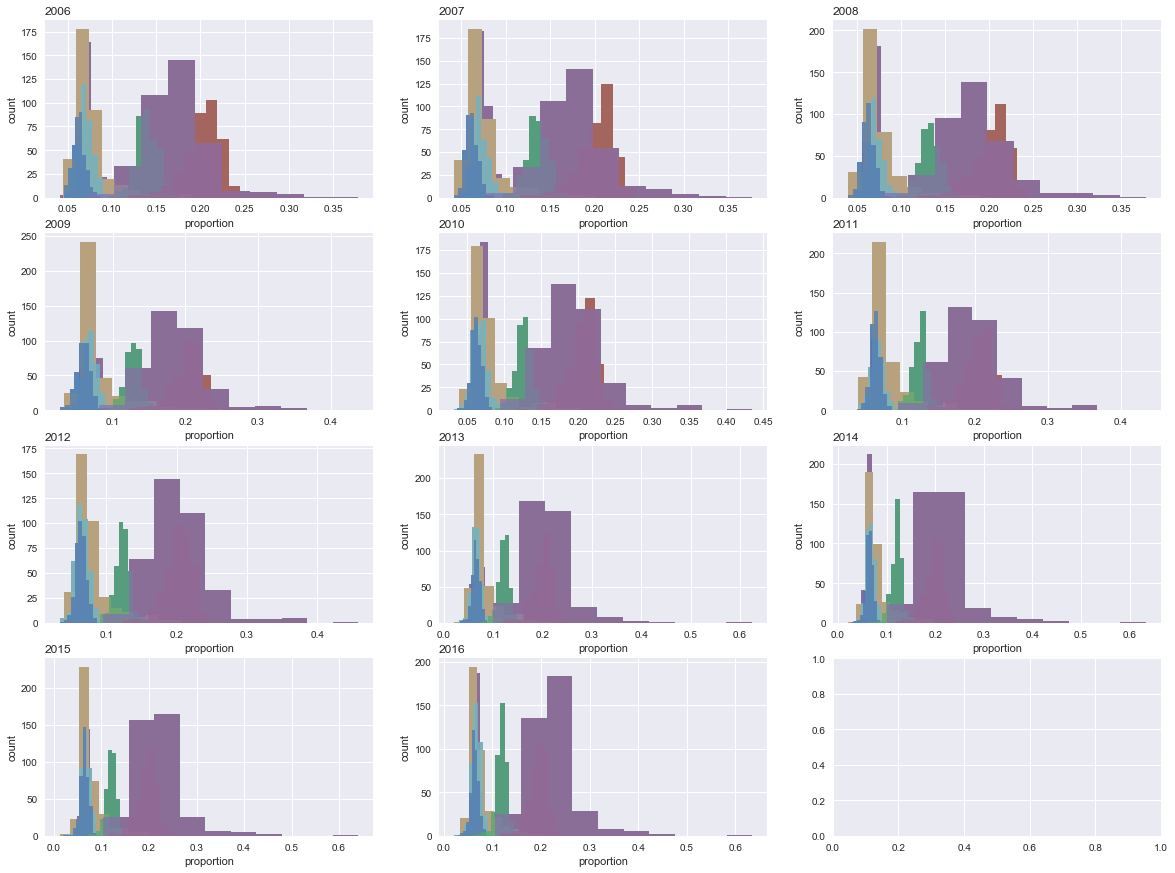

In [265]:
years = range(2006, 2017)
axs = get_axs(4,3,20,15)

crime_data_sub ={}

for i, year in enumerate(years):
    for j in crime_data:
        crime_data_sub[year] = crime_data[crime_data['year'] == year]
        axs[i].hist(crime_data_sub[year]['a1'], 10, alpha=0.7, label='15-19') 
        axs[i].hist(crime_data_sub[year]['a2'], 10, alpha=0.7, label='20-24')
        axs[i].hist(crime_data_sub[year]['a3'], 10, alpha=0.7, label='25-29')
        axs[i].hist(crime_data_sub[year]['a4'], 10, alpha=0.7, label='30-34')
        axs[i].hist(crime_data_sub[year]['a5'], 10, alpha=0.7, label='35-44')
        axs[i].hist(crime_data_sub[year]['a6'], 10, alpha=0.7, label='45-59')
        axs[i].hist(crime_data_sub[year]['a7'], 10, alpha=0.7, label='60+')
        
        axs[i].set_title((year), loc='left')
#         axs[i].set_xticklabels(['0','15-19', '20-24', '25-29', '30-34', '35-44', '45-59', '60+'])
        axs[i].set_xlabel('proportion')
        axs[i].set_ylabel('count')
#         axs[i].legend()


*Average age distribution per year*

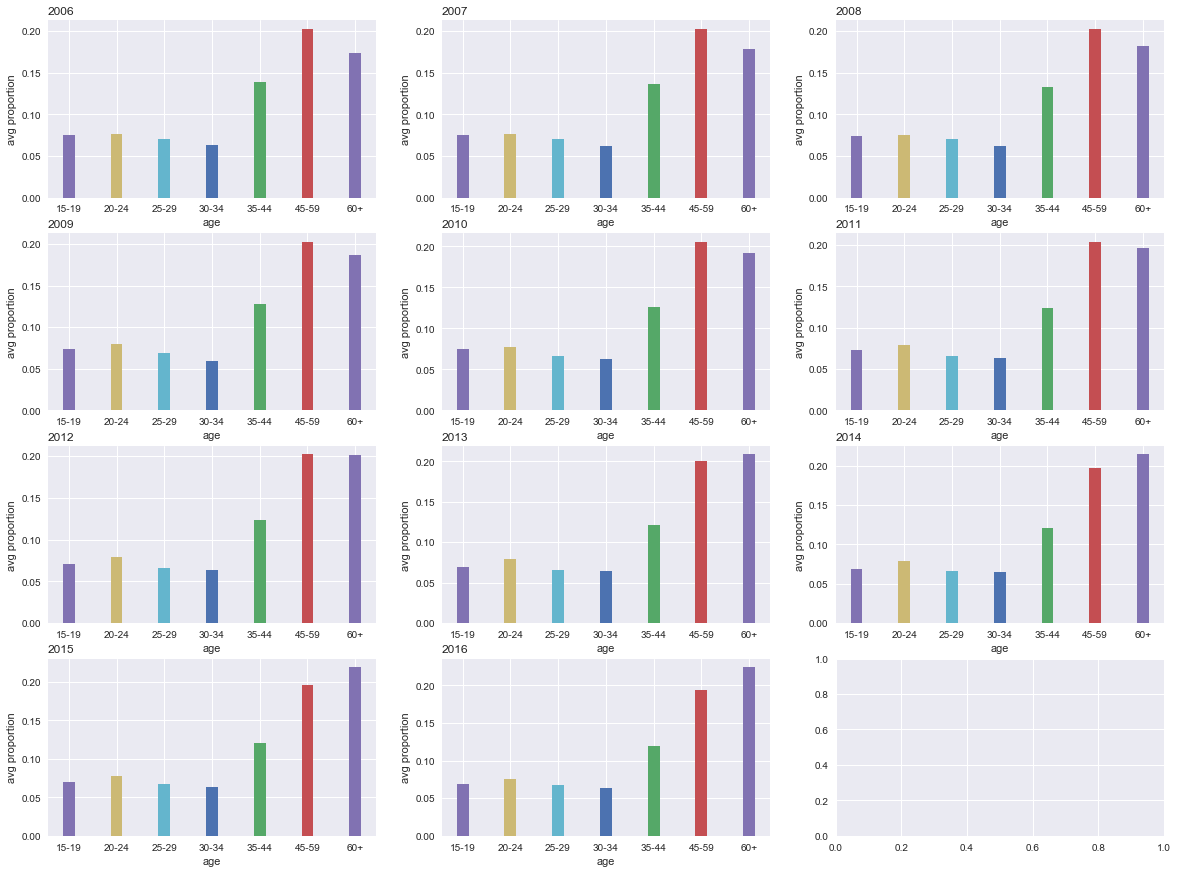

In [477]:
years = range(2006, 2017)
axs = get_axs(4,3,20,15)

crime_data_sub ={}

for i, year in enumerate(years):
    for j in crime_data:
        crime_data_sub[year] = crime_data[crime_data['year'] == year]      
        axs[i].bar(1, np.mean(crime_data_sub[year]['a1']), width=.25) 
        axs[i].bar(2, np.mean(crime_data_sub[year]['a2']), width=.25)
        axs[i].bar(3, np.mean(crime_data_sub[year]['a3']), width=.25)
        axs[i].bar(4, np.mean(crime_data_sub[year]['a4']), width=.25)
        axs[i].bar(5, np.mean(crime_data_sub[year]['a5']), width=.25)
        axs[i].bar(6, np.mean(crime_data_sub[year]['a6']), width=.25)
        axs[i].bar(7, np.mean(crime_data_sub[year]['a7']), width=.25)
        
        axs[i].set_title(year, loc='left')
        axs[i].set_xticklabels(['0','15-19', '20-24', '25-29', '30-34', '35-44', '45-59', '60+'])
        axs[i].set_xlabel('age')
        axs[i].set_ylabel('avg proportion')


*All the age populations against murder rate*

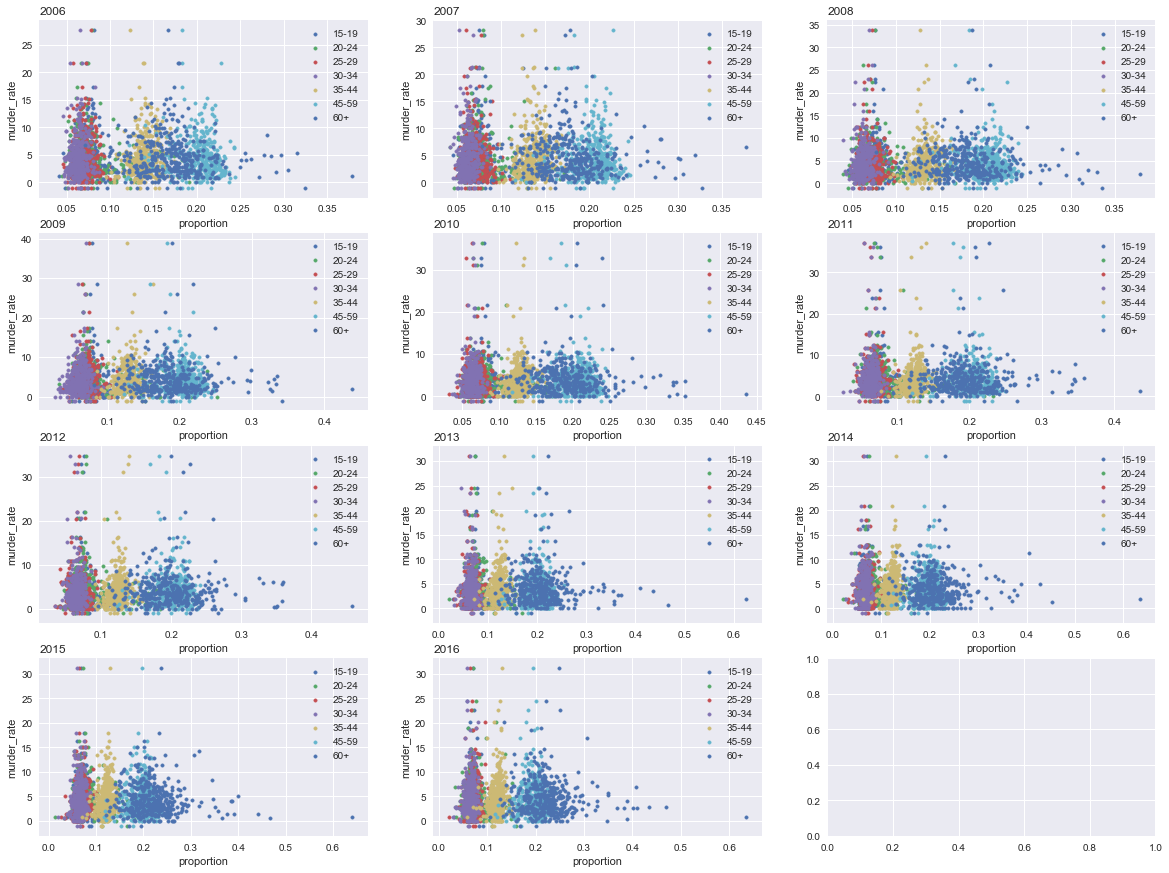

In [436]:
years = range(2006, 2017)
axs = get_axs(4,3,20,15)

crime_data_sub ={}

for i, year in enumerate(years):
    crime_data_sub[year] = crime_data.loc[crime_data['year'] == year]      
    axs[i].scatter(crime_data_sub[year]['a1'],crime_data_sub[year]['murder_rate'], marker='.', label='15-19') 
    axs[i].scatter(crime_data_sub[year]['a2'],crime_data_sub[year]['murder_rate'], marker='.', label='20-24') 
    axs[i].scatter(crime_data_sub[year]['a3'],crime_data_sub[year]['murder_rate'], marker='.', label='25-29') 
    axs[i].scatter(crime_data_sub[year]['a4'],crime_data_sub[year]['murder_rate'], marker='.', label='30-34') 
    axs[i].scatter(crime_data_sub[year]['a5'],crime_data_sub[year]['murder_rate'], marker='.', label='35-44') 
    axs[i].scatter(crime_data_sub[year]['a6'],crime_data_sub[year]['murder_rate'], marker='.', label='45-59') 
    axs[i].scatter(crime_data_sub[year]['a7'],crime_data_sub[year]['murder_rate'], marker='.', label='60+')  

    axs[i].set_title(year, loc='left')
    axs[i].set_xlabel('proportion')
    axs[i].set_ylabel('murder_rate')
    axs[i].legend()


*Growth or decrease in age group population vs. growth or decrease in murder rates

[[<matplotlib.axis.YTick at 0x22152cd4a20>,
 []]

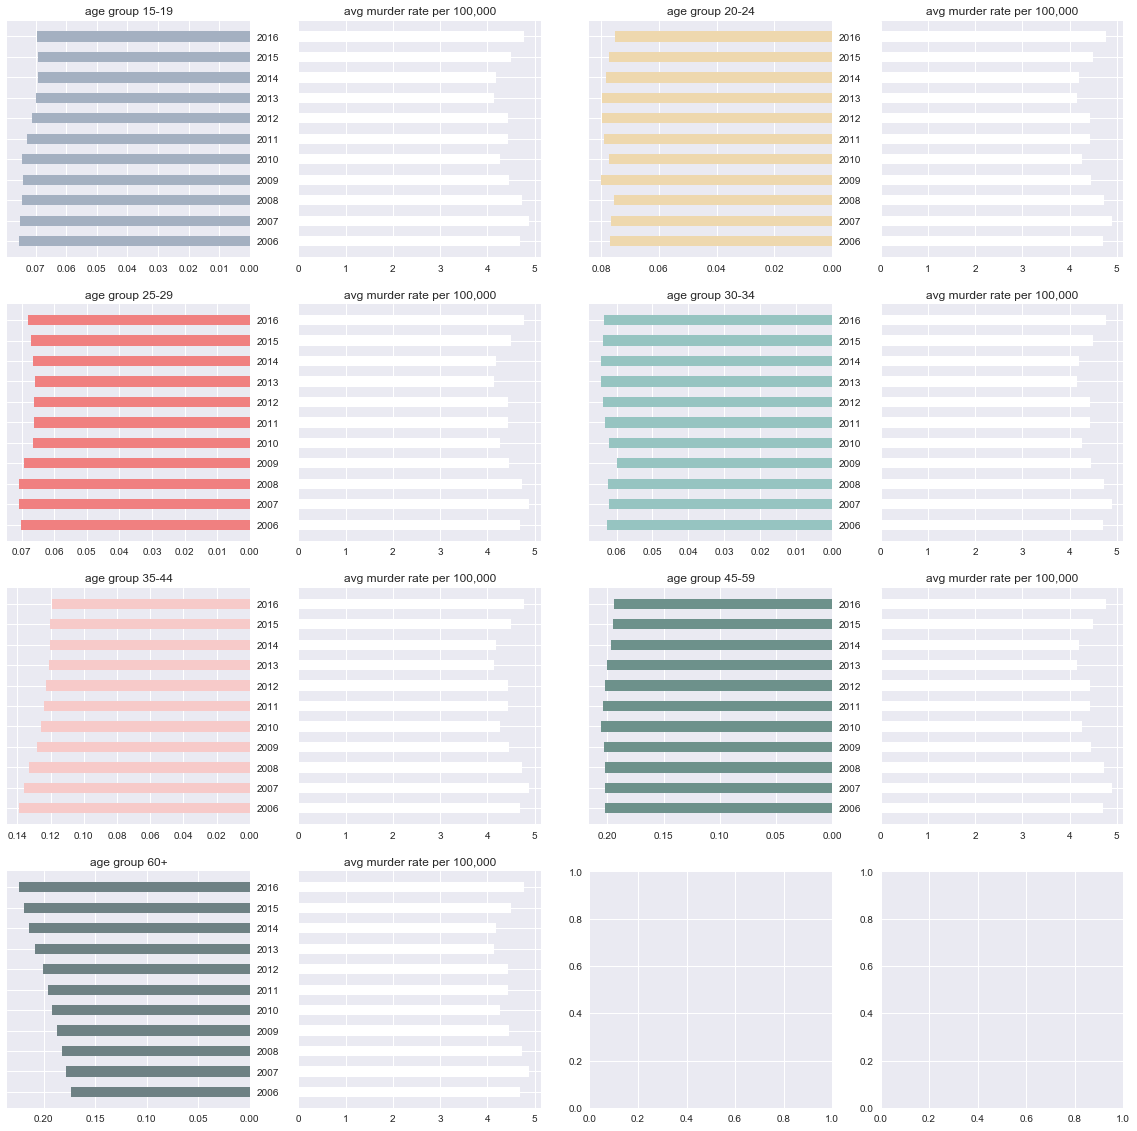

In [442]:
years = np.arange(2006, 2017)

columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']
y = np.arange(1,12)

data_a1 = []
data_a2 = []
data_a3 = []
data_a4 = []
data_a5 = []
data_a6 = []
data_a7 = []

data_murder = []

for year in years:
    data_a1.append(np.mean(crime_data[crime_data['year'] == year]['a1']))
    data_a2.append(np.mean(crime_data[crime_data['year'] == year]['a2']))
    data_a3.append(np.mean(crime_data[crime_data['year'] == year]['a3']))
    data_a4.append(np.mean(crime_data[crime_data['year'] == year]['a4']))
    data_a5.append(np.mean(crime_data[crime_data['year'] == year]['a5']))
    data_a6.append(np.mean(crime_data[crime_data['year'] == year]['a6']))
    data_a7.append(np.mean(crime_data[crime_data['year'] == year]['a7']))

for year in years:
    data_murder.append(np.mean(crime_data[crime_data['year'] == year]['murder_rate']))    

axs = get_axs(4,4,20,20)
axs[0].barh(y, data_a1, align='center', color='#a4b0c1', zorder=10, height=0.5)
axs[0].set(title='age group 15-19')
axs[0].invert_xaxis()
axs[0].set(yticks=y, yticklabels=years)
axs[0].yaxis.tick_right()

axs[1].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[1].set(title='avg murder rate per 100,000')
axs[1].set(yticks=y, yticklabels=[])

axs[2].barh(y, data_a2, align='center', color='#eed8ae', zorder=10, height=0.5)
axs[2].set(title='age group 20-24')
axs[2].invert_xaxis()
axs[2].set(yticks=y, yticklabels=years)
axs[2].yaxis.tick_right()

axs[3].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[3].set(title='avg murder rate per 100,000')
axs[3].set(yticks=y, yticklabels=[])

axs[4].barh(y, data_a3, align='center', color='#f08080', zorder=10, height=0.5)
axs[4].set(title='age group 25-29')
axs[4].invert_xaxis()
axs[4].set(yticks=y, yticklabels=years)
axs[4].yaxis.tick_right()

axs[5].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[5].set(title='avg murder rate per 100,000')
axs[5].set(yticks=y, yticklabels=[])

axs[6].barh(y, data_a4, align='center', color='#96c4c1', zorder=10, height=0.5)
axs[6].set(title='age group 30-34')
axs[6].invert_xaxis()
axs[6].set(yticks=y, yticklabels=years)
axs[6].yaxis.tick_right()

axs[7].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[7].set(title='avg murder rate per 100,000')
axs[7].set(yticks=y, yticklabels=[])

axs[8].barh(y, data_a5, align='center', color='#f7cac9', zorder=10, height=0.5)
axs[8].set(title='age group 35-44')
axs[8].invert_xaxis()
axs[8].set(yticks=y, yticklabels=years)
axs[8].yaxis.tick_right()

axs[9].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[9].set(title='avg murder rate per 100,000')
axs[9].set(yticks=y, yticklabels=[])

axs[10].barh(y, data_a6, align='center', color='#6d918b', zorder=10, height=0.5)
axs[10].set(title='age group 45-59')
axs[10].invert_xaxis()
axs[10].set(yticks=y, yticklabels=years)
axs[10].yaxis.tick_right()

axs[11].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[11].set(title='avg murder rate per 100,000')
axs[11].set(yticks=y, yticklabels=[])

axs[12].barh(y, data_a7, align='center', color='#6e8184', zorder=10, height=0.5)
axs[12].set(title='age group 60+')
axs[12].invert_xaxis()
axs[12].set(yticks=y, yticklabels=years)
axs[12].yaxis.tick_right()

axs[13].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[13].set(title='avg murder rate per 100,000')
axs[13].set(yticks=y, yticklabels=[])



#### Income and Educational Attainment
Typically, there is a colinear relationship between higher income and higher educational attainment. Both of these may also be a factor in lower crime rate. We looked at the basic make up of educational attainment per year with along wtih income rates per capita. However, there is also no significant correlation between murder rates and either income and educational attainment

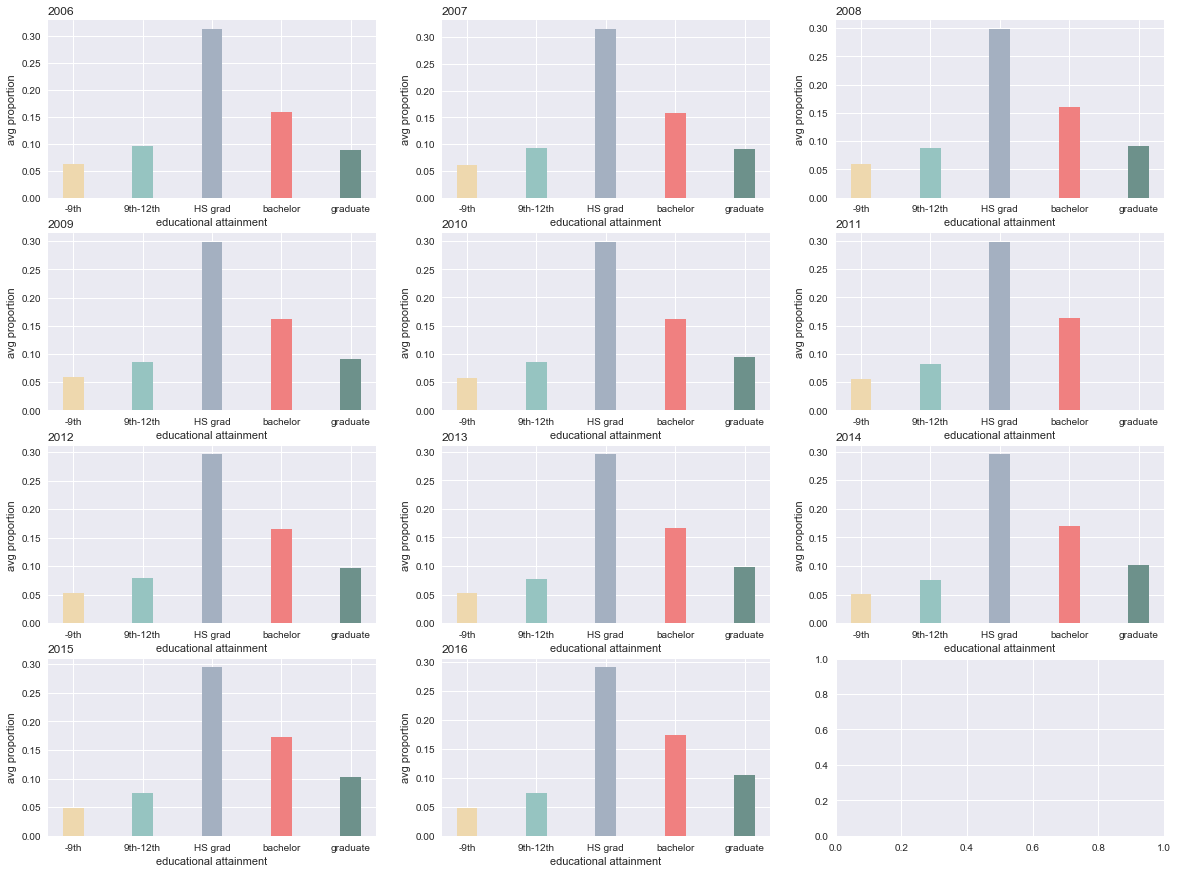

In [478]:
years = range(2006, 2017)
axs = get_axs(4,3,20,15)

crime_data_sub ={}

for i, year in enumerate(years):
    for j in crime_data:
        crime_data_sub[year] = crime_data.loc[crime_data['year'] == year]      
        axs[i].bar(1, np.mean(crime_data_sub[year]['e1']), width=.3, color = '#eed8ae') 
        axs[i].bar(2, np.mean(crime_data_sub[year]['e2']), width=.3, color = '#96c4c1')
        axs[i].bar(3, np.mean(crime_data_sub[year]['e3']), width=.3, color = '#a4b0c1')
        axs[i].bar(4, np.mean(crime_data_sub[year]['e4']), width=.3, color = '#f08080')
        axs[i].bar(5, np.mean(crime_data_sub[year]['e5']), width=.3, color = '#6d918b')

        axs[i].set_title(year, loc='left')
        axs[i].set_xticklabels(['0','-9th', '9th-12th', 'HS grad', 'bachelor', 'graduate'])
        axs[i].set_xlabel('educational attainment')
        axs[i].set_ylabel('avg proportion')


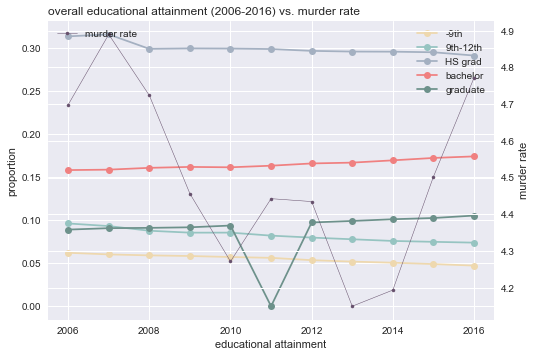

In [514]:
years = np.arange(2006, 2017)
# axs = get_axs(1,1,12,10)

ed1 =[]
ed2 =[]
ed3 =[]
ed4 =[]
ed5 =[]

fig = plt.figure()
ax = fig.add_subplot(111)

for i,year in enumerate(years):
    crime_data_sub = crime_data[crime_data['year'] == year]      
    ed1.append(np.mean(crime_data_sub['e1'])) 
    ed2.append(np.mean(crime_data_sub['e2']))
    ed3.append(np.mean(crime_data_sub['e3']))
    ed4.append(np.mean(crime_data_sub['e4']))
    ed5.append(np.mean(crime_data_sub['e5']))

ax.plot(years,ed1, marker='o', label = '-9th', color = '#eed8ae')
ax.plot(years,ed2, marker='o', label = '9th-12th', color = '#96c4c1')
ax.plot(years,ed3, marker='o', label = 'HS grad', color = '#a4b0c1')
ax.plot(years,ed4, marker='o', label = 'bachelor', color = '#f08080')
ax.plot(years,ed5, marker='o', label = 'graduate', color = '#6d918b')

ax.set_title('overall educational attainment (2006-2016) vs. murder rate', loc='left')
ax.set_xlabel('educational attainment')
ax.set_ylabel('proportion')
ax.legend(loc=1)

ax2 = ax.twinx()
ax2.plot(years, murder, marker='.', color='#67516d', label ='murder rate', linewidth =.5)
ax2.legend(loc=2)
ax2.set_ylabel('murder rate')

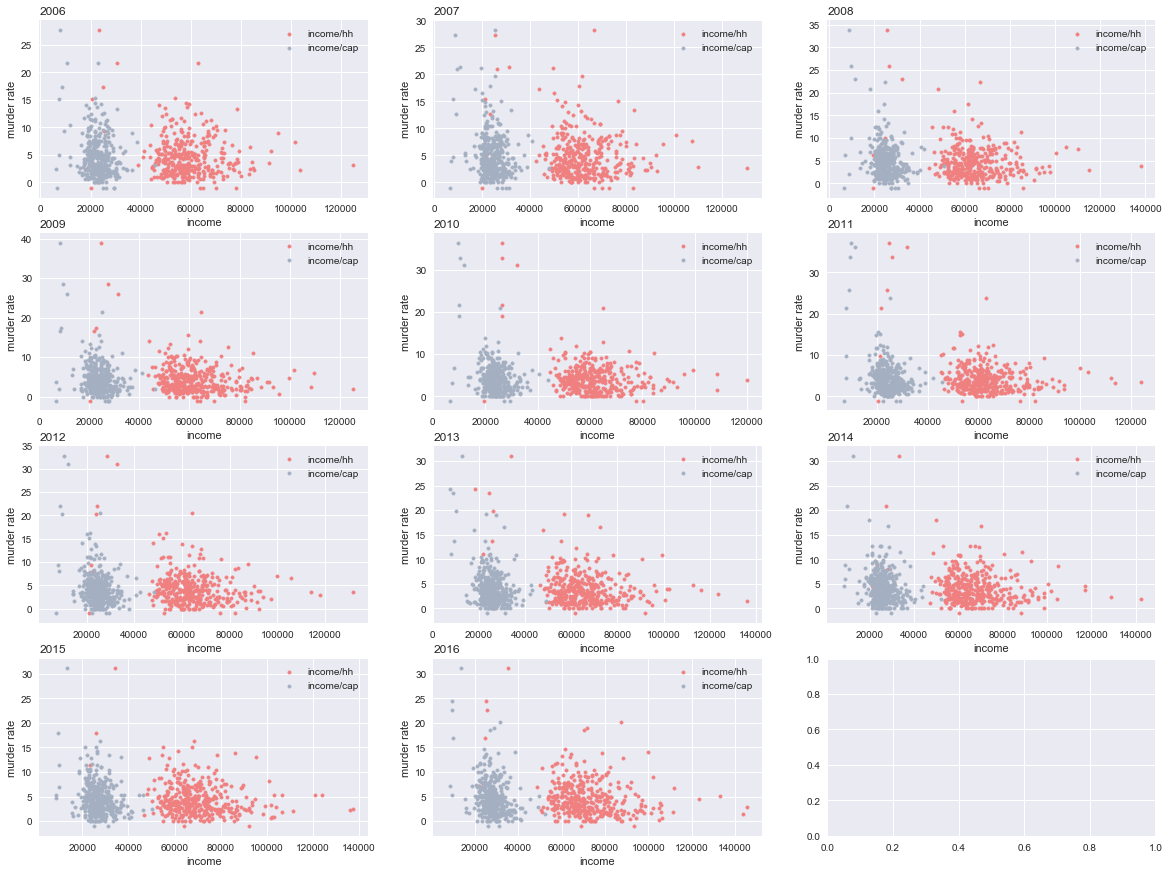

In [492]:
years = range(2006, 2017)
axs = get_axs(4,3,20,15)

crime_data_sub ={}

for i, year in enumerate(years):
    crime_data_sub[year] = crime_data.loc[crime_data['year'] == year]      
    axs[i].scatter(crime_data_sub[year]['i1'], crime_data_sub[year]['murder_rate'], marker='.', label='income/hh', color= '#f08080') 
    axs[i].scatter(crime_data_sub[year]['i2'], crime_data_sub[year]['murder_rate'], marker='.', label='income/cap', color= '#a4b0c1') 

    axs[i].set_title(year, loc='left')
    axs[i].set_xlabel('income')
    axs[i].set_ylabel('murder rate')

    axs[i].legend()

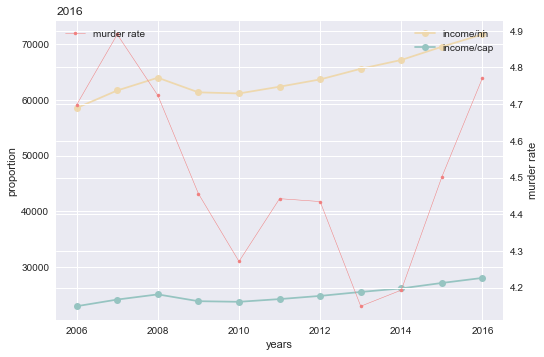

In [515]:
import matplotlib.pyplot as plt

years = np.arange(2006, 2017)

in1 =[]
in2 =[]

for i,year in enumerate(years):
    crime_data_sub = crime_data[crime_data['year'] == year]      
    in1.append(np.mean(crime_data_sub['i1'])) 
    in2.append(np.mean(crime_data_sub['i2']))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(years,in1, marker='o', label = 'income/hh', color = '#eed8ae')
ax.plot(years,in2, marker='o', label = 'income/cap', color = '#96c4c1')

ax.set_title(year, loc='left')
ax.set_xlabel('years')
ax.set_ylabel('proportion')
ax.legend(loc=1)

ax2 = ax.twinx()
ax2.plot(years, murder, marker='.', color='#f08080', label ='murder rate', linewidth =.5)
ax2.legend(loc=2)
ax2.set_ylabel('murder rate')

[[<matplotlib.axis.YTick at 0x22157c93ba8>,
 []]

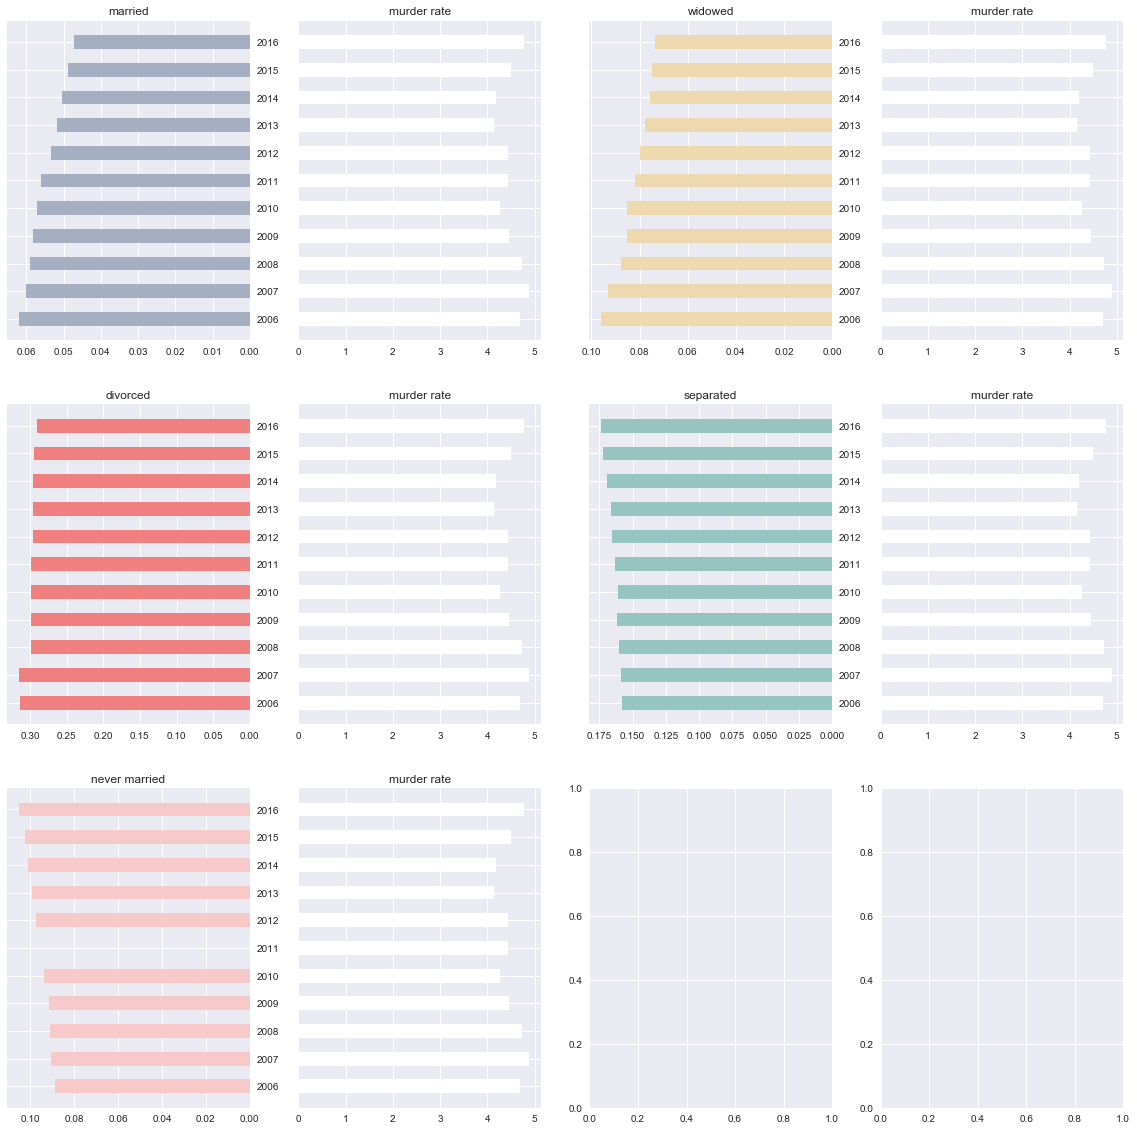

In [305]:
years = np.arange(2006, 2017)

columns = ['e1', 'e2', 'e3', 'e4', 'e5']
y = np.arange(1,12)

data_e1 = []
data_e2 = []
data_e3 = []
data_e4 = []
data_e5 = []

data_murder = []

for year in years:
    data_e1.append(np.mean(crime_data[crime_data['year'] == year]['e1']))
    data_e2.append(np.mean(crime_data[crime_data['year'] == year]['e2']))
    data_e3.append(np.mean(crime_data[crime_data['year'] == year]['e3']))
    data_e4.append(np.mean(crime_data[crime_data['year'] == year]['e4']))
    data_e5.append(np.mean(crime_data[crime_data['year'] == year]['e5']))

for year in years:
    data_murder.append(np.mean(crime_data[crime_data['year'] == year]['murder_rate']))    

axs = get_axs(3,4,20,20)
axs[0].barh(y, data_e1, align='center', color='#a4b0c1', zorder=10, height=0.5)
axs[0].set(title='married')
axs[0].invert_xaxis()
axs[0].set(yticks=y, yticklabels=years)
axs[0].yaxis.tick_right()

axs[1].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[1].set(title='murder rate')
axs[1].set(yticks=y, yticklabels=[])

axs[2].barh(y, data_e2, align='center', color='#eed8ae', zorder=10, height=0.5)
axs[2].set(title='widowed')
axs[2].invert_xaxis()
axs[2].set(yticks=y, yticklabels=years)
axs[2].yaxis.tick_right()

axs[3].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[3].set(title='murder rate')
axs[3].set(yticks=y, yticklabels=[])

axs[4].barh(y, data_e3, align='center', color='#f08080', zorder=10, height=0.5)
axs[4].set(title='divorced')
axs[4].invert_xaxis()
axs[4].set(yticks=y, yticklabels=years)
axs[4].yaxis.tick_right()

axs[5].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[5].set(title='murder rate')
axs[5].set(yticks=y, yticklabels=[])

axs[6].barh(y, data_e4, align='center', color='#96c4c1', zorder=10, height=0.5)
axs[6].set(title='separated')
axs[6].invert_xaxis()
axs[6].set(yticks=y, yticklabels=years)
axs[6].yaxis.tick_right()

axs[7].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[7].set(title='murder rate')
axs[7].set(yticks=y, yticklabels=[])

axs[8].barh(y, data_e5, align='center', color='#f7cac9', zorder=10, height=0.5)
axs[8].set(title='never married')
axs[8].invert_xaxis()
axs[8].set(yticks=y, yticklabels=years)
axs[8].yaxis.tick_right()

axs[9].barh(y, data_murder, align='center', color='white', zorder=10, height=0.5)
axs[9].set(title='murder rate')
axs[9].set(yticks=y, yticklabels=[])


#### All marital status
Are communities with higher proportions of married couples less prone to murder crimes (because of different lifestyles, different committment, etc.)? We looked at the data per year and plotted the different marital status and their proportions against the murder rates. There's a slight odd pattern, similar that we had seen in the racial data between blacks and whites - the closer the proportions of married vs. never married demographics, the higher the murder rates. 

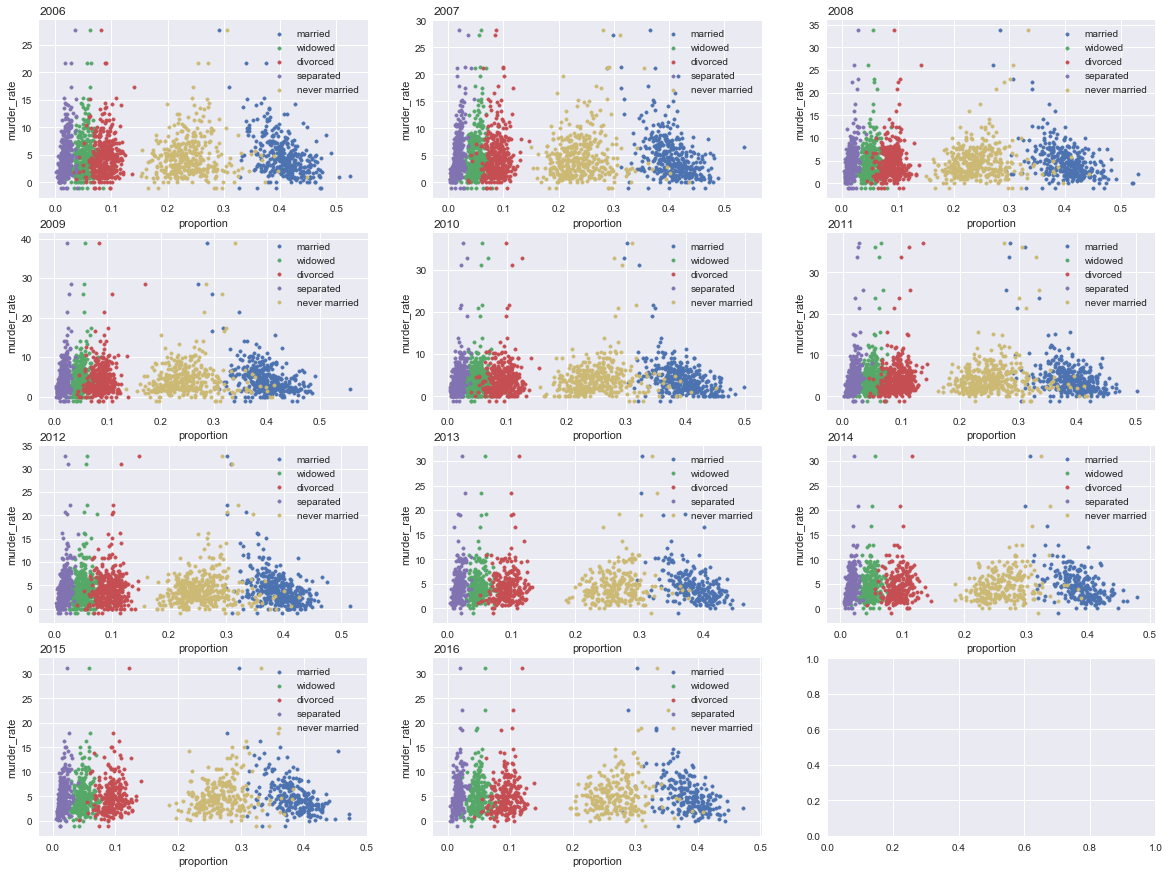

In [516]:
years = range(2006, 2017)
axs = get_axs(4,3,20,15)

crime_data_sub ={}

for i, year in enumerate(years):
    crime_data_sub[year] = crime_data[crime_data['year'] == year]      
    axs[i].scatter(crime_data_sub[year]['m1'],crime_data_sub[year]['murder_rate'], marker='.', label='married') 
    axs[i].scatter(crime_data_sub[year]['m2'],crime_data_sub[year]['murder_rate'], marker='.', label='widowed') 
    axs[i].scatter(crime_data_sub[year]['m3'],crime_data_sub[year]['murder_rate'], marker='.', label='divorced') 
    axs[i].scatter(crime_data_sub[year]['m4'],crime_data_sub[year]['murder_rate'], marker='.', label='separated') 
    axs[i].scatter(crime_data_sub[year]['m5'],crime_data_sub[year]['murder_rate'], marker='.', label='never married') 


    axs[i].set_title(year, loc='left')
    axs[i].set_xlabel('proportion')
    axs[i].set_ylabel('murder_rate')
    axs[i].legend()


#### Vacancy 
Is vacancy rate corrolated to murder rates? Typically, blighted communities tend to have higher rates of crimes, though it's unclear which causes which (ie. if blighted neighborhoods are a result of high crime rates or if high crime rates happen in blighted areas). We did a simple plot of the proportion of vacancy with murder rates. We took the vacancy data (proportion of vacant buildings to the total number of buildings). 

Hoowever, there is no strong correlation between the two.

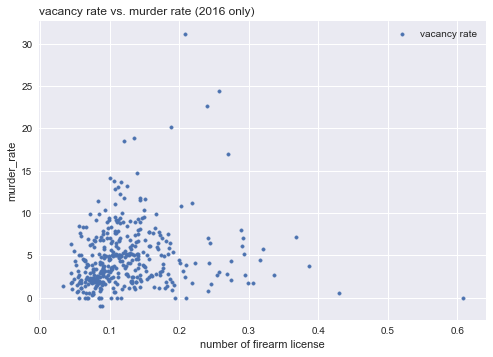

In [540]:
years = 2016

crime_data_sub ={}

# for i, year in enumerate(years):
crime_data_sub[2016] = crime_data[crime_data['year'] == 2016]      
plt.scatter(crime_data_sub[2016]['vr'],crime_data_sub[2016]['murder_rate'], marker='.', label='vacancy rate') 

plt.title('vacancy rate vs. murder rate (2016 only)', loc='left')
plt.xlabel('number of firearm license')
plt.ylabel('murder_rate')
plt.legend()

#### Firearm License
Aside from demographic data, we also looked for data around guns and firearms and came across an open data from the Bureau of Alcohol, Tobacco, Firearms, and Explosives website which lists the names of companies or persons carrying firearm licenses for the year 2016 by state. We have matched the MSA with the states in order to combine the two datasets.

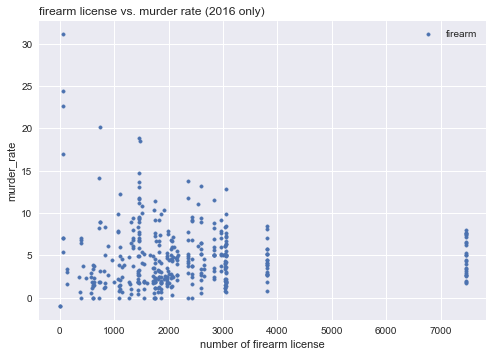

In [525]:
years = 2016

crime_data_sub ={}

# for i, year in enumerate(years):
crime_data_sub[2016] = crime_data[crime_data['year'] == 2016]      
plt.scatter(crime_data_sub[2016]['firearms'],crime_data_sub[2016]['murder_rate'], marker='.', label='firearm') 

plt.title('firearm license vs. murder rate (2016 only)', loc='left')
plt.xlabel('number of firearm license')
plt.ylabel('murder_rate')
plt.legend()


#### Colinearity
Some of the predictors may be colinear, such as age and education, as well as marital states and age. To check this, we developed a colinearity map to see which ones are actually colinear. In order to get a truer picture of colinear elements, we had to drop the NaNs. And since the MSA is simply a name, we also dropped that column prior to producing the colinearity map. 

There seems to be a high correlation between marriage/divorce with that of higher education (grad school or bachelor). There's also some correlation between people of more minority groups living in similar proportions. Therer's also a high correlation between people ages 20 to 29 with never being married. 

In [532]:
drop_crime_data = crime_data.dropna(how='any')

In [533]:
drop_crime_data = drop_crime_data.drop(['msa'], axis=1)

In [537]:
x_train, y_train, x_test, y_test = split(drop_crime_data, 1, -1)

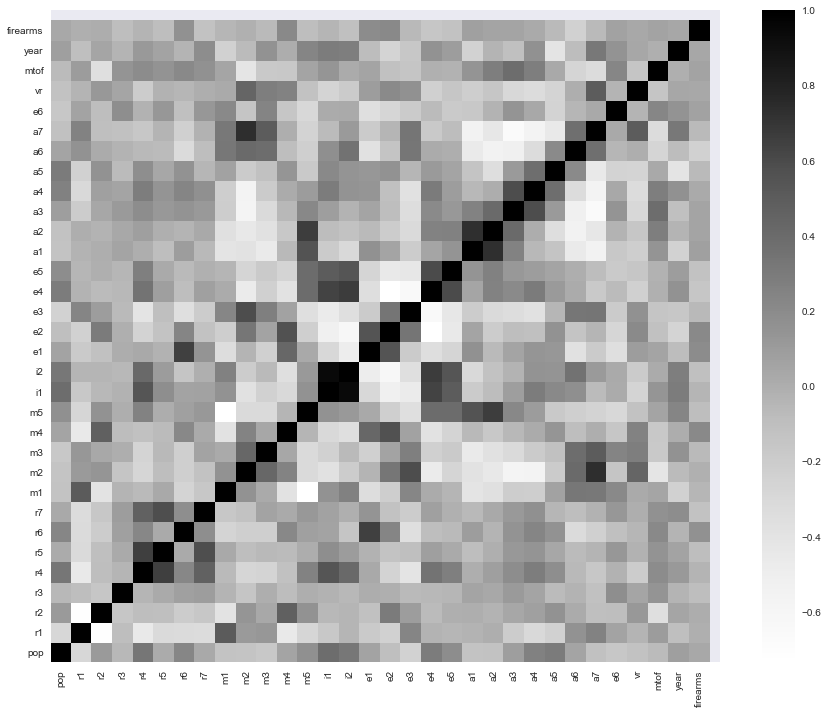

In [538]:
from pylab import pcolor, show, colorbar, xticks, yticks

x_train_flip = np.transpose(x_train)
cmap = np.corrcoef(x_train_flip)

fig, ax = plt.subplots(figsize=(15,12))
pcolor(cmap)
colorbar()
yticks(np.arange(0.5,33.5),x_train.columns)
xticks(np.arange(0.5,33.5),x_train.columns, rotation='vertical')
print()
